# 2025-01-13 First Day
## CSCI-5636: Numerical solution of partial differential equations (PDE)

## Instructor: Fruzsina Agocs, fruzsina.agocs@colorado.edu, ECOT 614
## Meeting: Mon, Wed at 5:05-6:20pm in ECEE 283 (or virtually)
## Office hours: Every other Wednesday starting 01/22, ECCS 114E and ECOT 614

# What are PDE?

Equations involving a multivariate function $u(x_1, x_2, \ldots, x_n) = u(\mathbf{x})$ and its derivatives

## Commonly occurring terms

* Gradient $\nabla u(\mathbf x)$
  * scalar field to vector field, $\mathbb{R}^n \to \mathbb{R}$
* Curl $\nabla\times \mathbf v(\mathbf x)$
 * vector field to vector field, $\mathbb{R}^n \to \mathbb{R}^n$
* Divergence $d(\mathbf x) = \nabla\cdot \mathbf v(\mathbf x)$
  * vector field to scalar field, $\mathbb{R}^n \to \mathbb{R}$
* Laplacian $\Delta u := \nabla \cdot \nabla u$
* time derivatives: $\frac{\partial u(t, \mathbf x)}{\partial t}$

## What do PDEs describe?

* heat transfer
* electrostatics, electromagnetics
* solid mechanics
* fluid mechanics
* quantum mechanics
* population dynamics

## Classes of methods we'll cover
* At grid points with rules to approximate derivatives
  * Finite Difference / collocation
* A weak (integral) over elements with rules to reconstruct from element averages and define fluxes
  * Finite Volume
* A weak form over elements with solution and "test functions" in the same space
  * Finite Element / Galerkin

## How expensive is it?

* Suppose our domain is $\Omega = (0, 1)^3$
* We discretize it by dividing each side into segments of length $h$ ($n := 1/h$ of them)
* We have a total of $N := n^3$ volume elements
* Assume:
    * Method whose error goes as $10 h^4$
    * Implementation 1 of this method whose runtime scales $\propto N = n^3$
    * Implementation 2 (less efficient) scales $\propto N^2 = n^6$ 
    * We say $\mathcal{O}(N)$ and $\mathcal{O}(N^2)$, respectively
   

* Error vs $n$ (or $h$) is the _convergence_ of a method
* Computational cost (e.g. runtime) vs $n$ is the _complexity_ of the method
* In practice, the **most important plot** is error vs computational cost (work-precision diagram). Why?
* Let's see it for our two methods

In [4]:
using Plots

# a common "good" discretization
error(h) = min(1, 10*h^4)

function cost(h)
    n = 1/h # number of points per dimension
    N = n^3 # total number of grid points in 3D
    N
end

function cost2(h)
    N = cost(h)
    N^2
end

cost2 (generic function with 1 method)

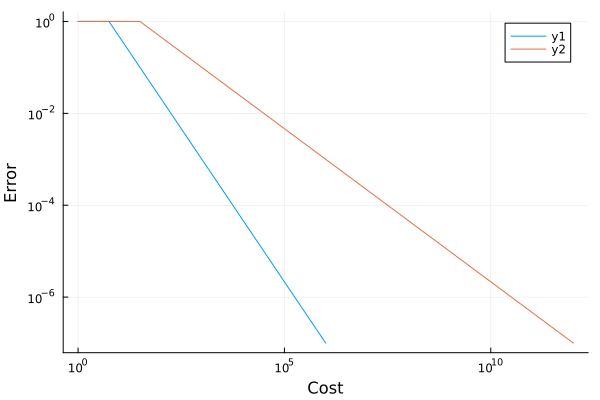

In [5]:
plot([cost, cost2], error, .01, 1, xscale=:log10, yscale=:log10,
  xlabel="Cost", ylabel="Error")

Note:
* To achieve an error of $10^{-4}$, method 2 needs much more computational resources
* This graph lets you read off exactly how expensive the computation will be for a given accuracy (how long you have to wait, your usage)

# What goes in? What comes out?

In:
* Equations
  * Conservation
  * Variational principles
  * Materials
* Geometry
  * meshing needed?
* Boundary conditions
  * essential/Dirichlet
  * natural/Neumann
  * mixed
* Initial conditions

Out: 
* Discrete solutions
  * Sampled on a grid
  * Time series
* Quantities of Interest (QoI)
  * Heat flux
  * Maximum temperature
  * Maximum stress
  * Lift, drag
* Eigensolutions
  * Resonant frequencies/modes
  * Orbitals

# Who works with PDE solvers?

* Numerical analysts
* Domain scientists and engineers
* Materials scientists
* HPC specialists
* Optimizers
* Statisticians

# What skills should they have?

Breakout groups: pick one role and make a list of essential and nice-to-have skills, plus at least one question. Pick one member to report out.

* ...

* ...

# Computer Science = Runnable Abstraction Science

## In the "grinder"
* Mathematical language and principles for each major class of method
  * What is covered by theory
  * When you're venturing off-trail
  * Analytic tools to predict and debug
* Realistic cost and exploitable structure
  * Performance on modern hardware
  * Algebraic solvers and time integrators
* Write/modify stand-alone code
* Select and use (parallel) libraries

## How can you trust the solution?
* Verification: solving the problem right
* Validation: solving the right problem


# On programming languages

## C
Reliable and popular for libraries (PETSc, etc.). "Simple", unsafe, capable of encapsulation.

## C++
Popular with applications and some libraries. Powerful, but complicated and unsafe.

## Fortran
The OG of numerical computing. Good for "array programming", but encapsulation is hard. Unsafe depending on dialect.

## Julia
For ground-up examples in class and in activities. Capable of high performance, expressive multiple dispatch, works well in a notebook. Library ecosystem for PDEs is limited, but rapidly improving.

## Python
Good access to JIT, libraries like FEniCS. Poor native performance, but good libraries to compiled code.

## Rust
New compiled language. Good performance, encapsulation, safety, static analysis. Poor libraries (so far).

You don't need to know any of these well and you can choose the language for your project.
- I will provide feedback
- I will be a mentor and guide navigating this field
- I will help you get what you want out of the class

**Note**:
* "unsafe" refers to the ability to introduce bugs related to how memory is used
* Memory safety bugs = security issues. 
    * "Out of bounds" reads and writes
    * "Use after free"
